In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import math
import csv
import re

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import pi
from scipy.fftpack import fft

LOG.propagate = False

In [44]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

tof = []
pose = []
accel = []

CURR_LOG_ARRAY = None
log_complete = False

def ble_msg_handler(sender, msg):
    msg = msg.decode("utf-8")
    end_regex = r'<END BUFFER [a-z, A-Z]*>'
    if re.search(end_regex, msg) != None:
        print("Buffer read complete.")
        log_complete = True
    msg_regex = r'[A-Za-z]*: -?(\d*.?(?:\d*)?)' # Match Data of the form "[name]: [data]"
    data = re.findall(msg_regex, msg)
    if data == None:
        return
    if len(data) == 0:
        return
    CURR_LOG_ARRAY.append(data)

2023-03-09 18:20:06,589 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:0c:66:2f:3c
2023-03-09 18:20:09,852 | INFO     |: Connected to c0:83:0c:66:2f:3c


In [41]:
ble.send_command(CMD.DISABLE_ROBOT, "")

2023-03-09 18:19:00,401 | INFO     |: Disconnected from C0:83:0C:66:2F:3C


In [40]:
ble.send_command(CMD.ENABLE_ROBOT, "")

In [172]:
ble.send_command(CMD.SET_PID_GAINS,"ROTATION:|0.015:|0.0002:|100.0")

In [45]:
print("starting reading")
ble.send_command(CMD.ENABLE_BUFFER, "POSE")
ble.send_command(CMD.ENABLE_BUFFER, "TOF")
ble.send_command(CMD.ENABLE_BUFFER, "MOTOR")
ble.send_command(CMD.SET_PID_GAINS,"ROTATION:|0.007:|0.00001:|0.0")
ble.send_command(CMD.ENABLE_ROBOT, "")
time.sleep(15)
ble.send_command(CMD.DISABLE_ROBOT, "")
ble.send_command(CMD.DISABLE_BUFFER, "POSE")
ble.send_command(CMD.DISABLE_BUFFER, "TOF")
ble.send_command(CMD.DISABLE_BUFFER, "MOTOR")
ble.start_notify(ble.uuid['RX_STRING'], ble_msg_handler)
print("reading complete")

starting reading
2023-03-09 18:20:31,646 | INFO     |: Disconnected from C0:83:0C:66:2F:3C


EOFError: 

In [9]:
CURR_LOG_ARRAY = tof
ble.send_command(CMD.RETRIEVE_BUFFER, "TOF")
print("Waiting for buffer to fill...")

Waiting for buffer to fill...
Buffer read complete.


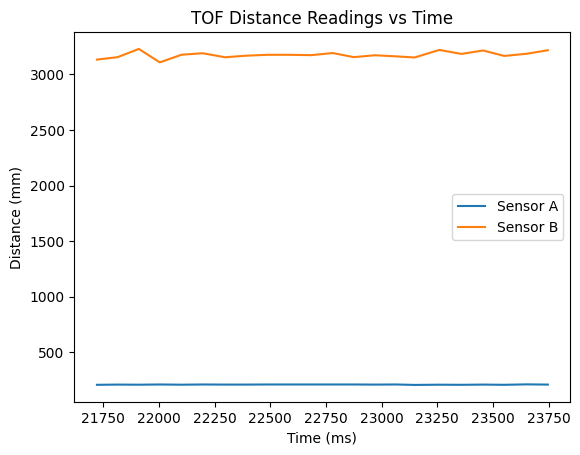

In [10]:

tof = np.array(tof).astype(float)
plt.plot(tof[:, 0], tof[:, 1])
plt.plot(tof[:, 0], tof[:, 2])
plt.xlabel("Time (ms)")
plt.ylabel("Distance (mm)")
plt.title("TOF Distance Readings vs Time")
plt.legend(["Sensor A", "Sensor B"])
plt.show()
